In [1]:
from ultralytics import YOLO
import glob
from natsort import natsorted
import cv2 , numpy as np



obj = YOLO("../model/yolov8s_6_2023.pt")

In [2]:
def detect_main_car( obj ,  img):
    results = obj(img , verbose=False , device="cpu")
    results = results[0].cpu().numpy().boxes.data

    if results.shape[0] == 0:
        return None
    
    # select cars and trucks
    indices = np.where((results[:, 5] != 2) & (results[:, 5] != 7))
    # Delete the rows where not car or truck
    cars = np.delete(results, indices, axis=0)
    
    diffs = cars[:, 3] - cars[:, 1]

    # Get the index of the row with the maximum difference (main car)
    max_index = np.argmax(diffs)

    # Get the row with the maximum difference
    biggest_car = cars[max_index]
    

    if cars.shape[0] == 0:
        return None
    dict = {
        "xmin":  biggest_car[0] ,
        "ymin":  biggest_car[1] ,
        "xmax":  biggest_car[2] , 
        "ymax":  biggest_car[3] ,
    }
    return dict

In [9]:




all_x = []
all_y = []

all_height = []

all_xmin = []
all_xmax = []
all_ymin = []
all_ymax = []


imgs = glob.glob("SEDAN_WHITE_SHIFT/*")
c=0
for im in natsorted(imgs)[::-1]:
    print(c)
    img1 = cv2.imread(im)
    bb = detect_main_car(obj , img1)
    img1 = cv2.circle(img1, (int((bb["xmax"] + bb["xmin"])/2) ,int((bb["ymax"] + bb["ymin"])/2) ), radius=10, color=(0, 0, 255), thickness=10)
    img1 = cv2.circle(img1, (int(img1.shape[1]/2) ,int(img1.shape[0]/2) ), radius=10, color=(0, 255, 0), thickness=10)
    all_x.append(int((bb["xmax"] + bb["xmin"])/2))
    all_y.append(int((bb["ymax"] + bb["ymin"])/2))
    all_height.append(int((bb["ymax"] - bb["ymin"])))

    all_xmin.append(bb["xmin"])
    all_xmax.append(bb["xmax"])
    all_ymin.append(bb["ymin"])
    all_ymax.append(bb["ymax"])

    cv2.imwrite(f"COOR_SEDAN_WHITE/{c}.jpg" , img1)
    c+=1





0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


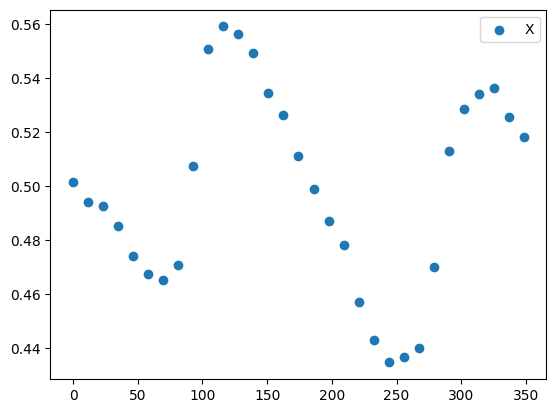

In [10]:
import matplotlib.pyplot as plt
range_ang = 360 / len(imgs)

yaws = []

for i in range(len(imgs)):
    yaws.append(range_ang * i)


all_height = [height / float(img1.shape[0]) for height in all_height]
all_x = [height / float(img1.shape[1]) for height in all_x]
all_y = [height / float(img1.shape[0]) for height in all_y]


plt.scatter( yaws , all_x)
# plt.scatter(yaws , all_y)
# plt.scatter(yaws , all_height)
plt.legend(["X" ])
plt.show()
# 




In [8]:
SED_H = all_height * 1
SED_x = all_x * 1
SED_y = all_y * 1 

In [11]:
SUV_H = all_height * 1
SUV_x = all_x * 1
SUV_y = all_y * 1 

In [14]:
SEDW_H = all_height * 1
SEDW_x = all_x * 1
SEDW_y = all_y * 1 

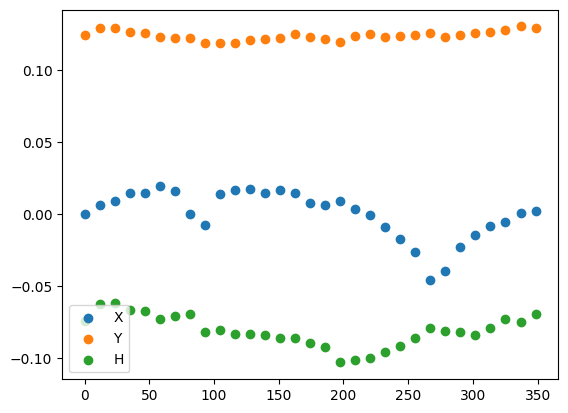

In [16]:
mean_list = [(x1 + x2) / 2 for x1, x2 in zip(SED_x, SUV_x)]



all_height_minus = [h1 - h2 for h1, h2 in zip(SED_H, SUV_H)]
all_x_minus = [x1 - x2 for x1, x2 in zip(SED_x, SUV_x)]
all_y_minus = [y1 - y2 for y1, y2 in zip(SED_y, SUV_y)]


plt.scatter( yaws , all_x_minus)
plt.scatter(yaws , all_y_minus)
plt.scatter(yaws , all_height_minus)
plt.legend(["X", "Y" , "H" ])
plt.show()


In [5]:



sum(all_height) / len(all_height) , sorted(all_height)[len(all_height) // 2] , max(all_height) , min(all_height)

(0.4452255418863504,
 0.44932630345635616,
 0.46338605741066197,
 0.4135910954891623)

In [6]:
c = 0-1

for i in yaws:
    c+=1
    print(c , i)

0 0.0
1 11.612903225806452
2 23.225806451612904
3 34.83870967741936
4 46.45161290322581
5 58.064516129032256
6 69.67741935483872
7 81.29032258064517
8 92.90322580645162
9 104.51612903225806
10 116.12903225806451
11 127.74193548387098
12 139.35483870967744
13 150.96774193548387
14 162.58064516129033
15 174.19354838709677
16 185.80645161290323
17 197.4193548387097
18 209.03225806451613
19 220.6451612903226
20 232.25806451612902
21 243.8709677419355
22 255.48387096774195
23 267.0967741935484
24 278.7096774193549
25 290.3225806451613
26 301.93548387096774
27 313.5483870967742
28 325.16129032258067
29 336.77419354838713
30 348.38709677419354
